# Fuel Consumption Prediction with Simple Linear Regression

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import os
import sys
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format = 'svg'


current_dir = os.getcwd()
dataset_path = os.path.join(current_dir, '../dataset/fuel_consumption/FuelConsumptionCo2.csv')
model_dir = os.path.join(current_dir, '../ml_model')
sys.path.append(model_dir)

# load data
df = pd.read_csv(dataset_path)
df.head

<bound method NDFrame.head of       MODELYEAR   MAKE       MODEL    VEHICLECLASS  ENGINESIZE  CYLINDERS  \
0          2014  ACURA         ILX         COMPACT         2.0          4   
1          2014  ACURA         ILX         COMPACT         2.4          4   
2          2014  ACURA  ILX HYBRID         COMPACT         1.5          4   
3          2014  ACURA     MDX 4WD     SUV - SMALL         3.5          6   
4          2014  ACURA     RDX AWD     SUV - SMALL         3.5          6   
...         ...    ...         ...             ...         ...        ...   
1062       2014  VOLVO    XC60 AWD     SUV - SMALL         3.0          6   
1063       2014  VOLVO    XC60 AWD     SUV - SMALL         3.2          6   
1064       2014  VOLVO    XC70 AWD     SUV - SMALL         3.0          6   
1065       2014  VOLVO    XC70 AWD     SUV - SMALL         3.2          6   
1066       2014  VOLVO    XC90 AWD  SUV - STANDARD         3.2          6   

     TRANSMISSION FUELTYPE  FUELCONSUMPTION_C

## Understanding the Data
This dataset is a fuel consumption dataset which has been made public by the Canadian Government. It contains model-specific comsumption ratings and estimated carbon dioxide ($CO_2$) emissions for new light-duty vehicles, year 2014. Some of the features are known to be linearly correlated to the $CO_2$ emissions volume, therefore they will be used to test our linear regression model.

- MODELYEAR e.g 2014
- MAKE e.g Acura
- MODEL e.g ILX
- VEHICLE CLASS e.g SUV
- ENGINE SIZE e.g 4.7
- CYLINDERS e.g 6
- TRANSMISSION e.g A6
- FUELTYPE e.g Z
- FUELCONSUMPTION_CITY (L/100km) e.g 10
- FUELCONSUMPTION_HWY (L/100km) e.g 8.0
- FUELCONSUMPTION_COMB
- FUELCONSUMPTION_COMB_MPG
- CO2EMISSIONS

## Data Exploration
First, we will have a descriptive exploration on our data.

In [24]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


<Axes: >

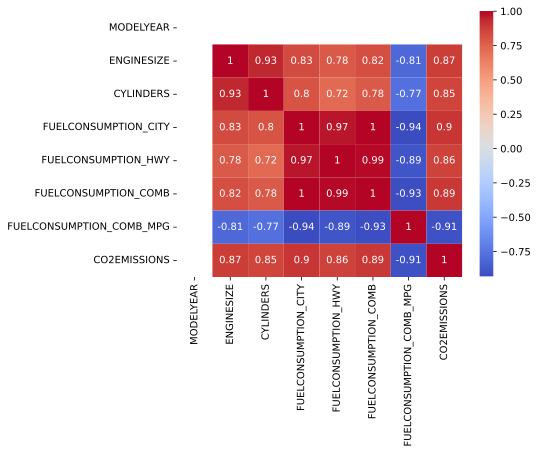

In [25]:
df_numeric = df.select_dtypes(include=[np.number])
corr = df_numeric.corr()
# fig, ax = plt.subplot(figsize=(9, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')

Thus, a car's emissions rate seems to be strongly correlated to all the numeric features.

## Feature Exploration
We will now explore a few features which we believe to be correlated to the $CO_2$ emissions volume. 

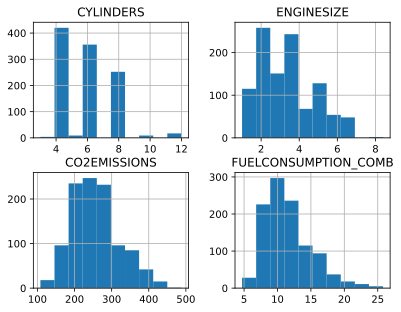

In [26]:
df_exp = df[['CYLINDERS', 'ENGINESIZE', 'CO2EMISSIONS', 'FUELCONSUMPTION_COMB']]
df_exp.hist()
plt.show()

Therefore, our histogram shows that these features seem to be correlated as they tend to be distributed in a similiar way.

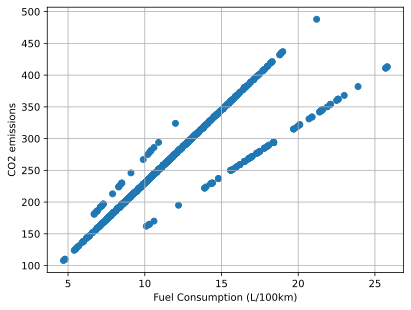

In [27]:
plt.figure()
plt.grid(True)
plt.scatter(x=df_exp['FUELCONSUMPTION_COMB'], y=df_exp['CO2EMISSIONS'])
plt.xlabel('Fuel Consumption (L/100km)')
plt.ylabel('CO2 emissions')
plt.show()

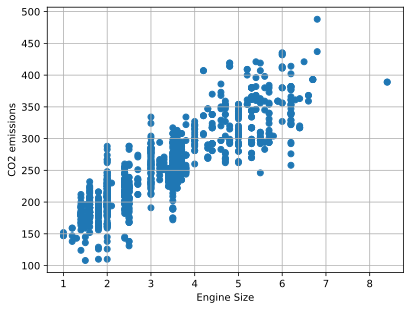

In [28]:
plt.figure()
plt.grid(True)
plt.scatter(x=df_exp['ENGINESIZE'], y=df_exp['CO2EMISSIONS'])
plt.xlabel('Engine Size')
plt.ylabel('CO2 emissions')
plt.show()

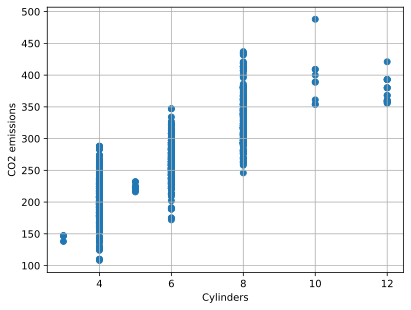

In [29]:
plt.figure()
plt.grid(True)
plt.scatter(x=df_exp['CYLINDERS'], y=df_exp['CO2EMISSIONS'])
plt.xlabel('Cylinders')
plt.ylabel('CO2 emissions')
plt.show()

As we can see, these three features seem to be linearly related to the CO2 emissions rate. Thus we will fit our model to them and analyze the metrics. 

## Simple Linear Regression
We have observed that the Estimated $CO_2$ emission rates are fairly correlated to the features Fuel Consumption, Engine Size and Number of Cylinders, resembling linear behavior. Thus, our goal isto fit our linear regression model to make predictions within this dataset, and use metrics such as $R^2$ and $MSE$ to judge if the model had satisfactory performance regarding the test set. We will split every dataset inf half between training and testing set. 

### Load Model

In [30]:
from linear_regressor import LinearRegressor

### Fit Fuel Consumption *versus* Emissions

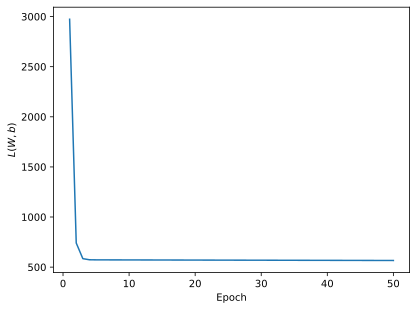

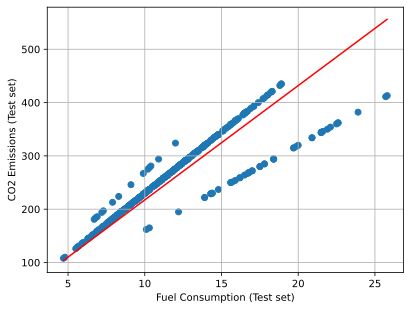

MSE:1215.4648743767616
Rsquared:0.7019379717259919


In [31]:
X, y = df_exp['FUELCONSUMPTION_COMB'], df_exp['CO2EMISSIONS']
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = X_train.reshape((1, X_train.shape[0]))
y_train = y_train.reshape((y_train.shape[0], 1))

X_test = X_test.reshape((1, X_test.shape[0]))
y_test = y_test.reshape((y_test.shape[0], 1))

reg1 = LinearRegressor(regularization='l2')
reg1.fit(X_train, y_train, verbose=True)

y_hat = reg1.predict(X_test)

plt.figure()
plt.grid(True)
plt.scatter(X_test, y_test)
plt.plot(X_test.T, y_hat, color='red')
plt.xlabel('Fuel Consumption (Test set)')
plt.ylabel('CO2 Emissions (Test set)')
plt.show()

print(f'MSE:{reg1.MSE(X_test, y_test)}')
print(f'Rsquared:{reg1.Rsquared(X_test, y_test)}')


## Fit Engine Size *versus* Emissions

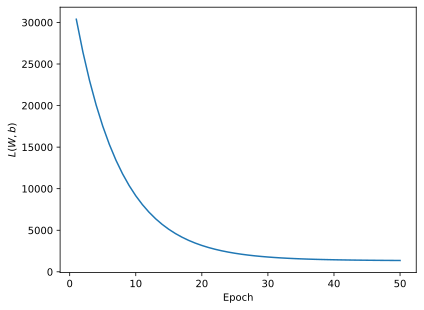

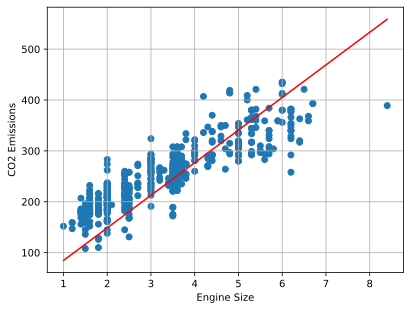

MSE:2567.589657264571
R-squared:0.3703635562384663


In [32]:
X, y = df_exp['ENGINESIZE'], df_exp['CO2EMISSIONS']
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = X_train.reshape((1, X_train.shape[0]))
y_train = y_train.reshape((y_train.shape[0], 1))

X_test = X_test.reshape((1, X_test.shape[0]))
y_test = y_test.reshape((y_test.shape[0], 1))

reg2 = LinearRegressor(regularization='l2')
reg2.fit(X_train, y_train, verbose=True)

y_hat = reg2.predict(X_test)

plt.figure()
plt.grid(True)
plt.scatter(X_test, y_test)
plt.plot(X_test.T, y_hat, color='red')
plt.xlabel('Engine Size')
plt.ylabel('CO2 Emissions')
plt.show()

print(f'MSE:{reg2.MSE(X_test, y_test)}')
print(f'R-squared:{reg2.Rsquared(X_test, y_test)}')

## Fit Cylinders *versus* Emissions

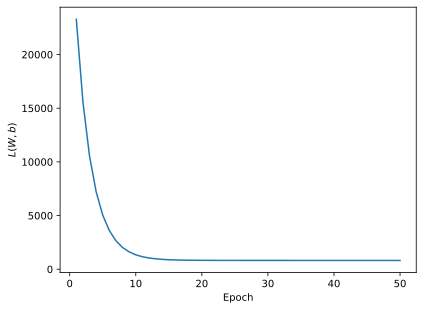

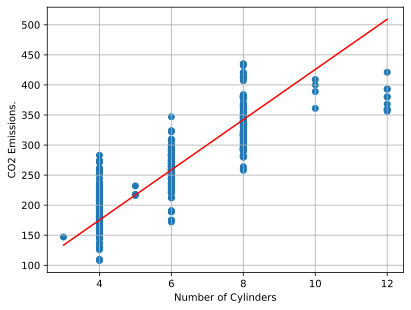

MSE:1575.148969703855
R-squared:0.6137345417041519


In [33]:
X, y = df_exp['CYLINDERS'], df_exp['CO2EMISSIONS']
X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
X_train = X_train.reshape((1, X_train.shape[0]))
y_train = y_train.reshape((y_train.shape[0], 1))

X_test = X_test.reshape((1, X_test.shape[0]))
y_test = y_test.reshape((y_test.shape[0], 1))

reg3 = LinearRegressor(regularization='l2')
reg3.fit(X_train, y_train, verbose=True)

y_hat = reg3.predict(X_test)

plt.figure()
plt.grid(True)
plt.scatter(X_test, y_test)
plt.plot(X_test.T, y_hat, color='red')
plt.xlabel('Number of Cylinders')
plt.ylabel('CO2 Emissions.')
plt.show()

print(f'MSE:{reg3.MSE(X_test, y_test)}')
print(f'R-squared:{reg3.Rsquared(X_test, y_test)}')

## Conclusions:
The primary features analyzed in relation to $CO_2$ emissions were Engine Size, Fuel Consumption, and Number of Cylinders. The results indicate that all three variables exhibit a reasonably linear relationship with $CO_2$ emissions, as measured by estimated ratings provided by the Canadian Government. The following table summarizes the $R^2$ and MSE metrics for the regression models fitted to each feature, highlighting the relative strength and accuracy of these relationships.

| Feature              | $R^2$ | MSE   |
|----------------------|-----------|-------|
| Engine Size          | 0.70      | 1215  |
| Fuel Consumption     | 0.37      | 2567  |
| Number of Cylinders  | 0.61      | 1575  |